To solve the partial differential equation (PDE):

$$
\frac{\partial^2 T(x, \tau)}{\partial x^2} = \frac{1}{a} \frac{\partial T(x, \tau)}{\partial \tau}
$$

with the boundary condition:

$$
-k \frac{\partial T}{\partial x}\Big|_{x=0} = h_0 (T_e(\tau) - T(0, \tau)),
$$

we can implement a numerical approach in Python using finite differences.

### Documentation for the Heat Diffusion Code

#### Overview
This Python script simulates the one-dimensional heat diffusion in a solid material using the explicit finite difference method. It solves the heat equation with a convective boundary condition at $ x = 0 $ and an insulated boundary at $ x = L $. The system is modeled over time, and the temperature evolution across the spatial domain is plotted.

#### Coefficients and Parameters
- **L**: `1.0` (Length of the domain in meters)
    - Defines the total length of the 1D material.
  
- **a**: `0.01` (Thermal diffusivity in $ \text{m}^2/\text{s} $)
    - Thermal diffusivity is a property of the material and determines how quickly heat spreads through the material. It combines thermal conductivity, density, and specific heat capacity.

- **k**: `1.0` (Thermal conductivity in $ \text{W}/(\text{m} \cdot \text{K}) $)
    - This coefficient defines the ability of the material to conduct heat. A higher $ k $ means heat diffuses more effectively across the material.

- **h_0**: `5.0` (Heat transfer coefficient in $ \text{W}/(\text{m}^2 \cdot \text{K}) $)
    - This coefficient represents the convective heat transfer at the boundary $ x = 0 $, where heat is exchanged with the surrounding environment.

- **Nx**: `100` (Number of spatial grid points)
    - The number of discrete spatial points used to represent the material. This creates a grid of points between $ x = 0 $ and $ x = L $.

- **dx**: `L / (Nx - 1)` (Spatial step size in meters)
    - The distance between adjacent grid points. Calculated as $ \Delta x = \frac{L}{Nx-1} $.

#### Time-Stepping Parameters
- **CFL**: `0.25` (CFL number for stability)
    - The Courant-Friedrichs-Lewy (CFL) number is used to maintain numerical stability in explicit finite difference methods. For heat diffusion, the CFL number should be less than or equal to 0.5.

- **dt**: `CFL * dx**2 / a` (Time step size in seconds)
    - The time step is determined based on the spatial resolution and thermal diffusivity. A smaller $ dt $ ensures stability of the numerical solution.

- **tau_max**: `10` (Maximum time in seconds)
    - The total time over which the simulation is run.

- **Nt**: `int(tau_max / dt)` (Number of time steps)
    - The number of time steps is determined by dividing the maximum simulation time $ \tau_{\text{max}} $ by the time step $ dt $.

#### Initial and Boundary Conditions
- **Initial Temperature Profile**:
    - Initially, the temperature is set to 300 K uniformly across the domain.
    - At the center of the material $ x = L/2 $, a "hotspot" with a temperature of 500 K is introduced to create a non-uniform initial condition that drives heat diffusion.

- **Boundary Condition at $ x = 0 $** (Convective boundary):
    - At the boundary $ x = 0 $, the heat flux is determined by the convective heat transfer with an external environment. The boundary condition is modeled using Fourier's law:

      $$
      -k \frac{\partial T}{\partial x}\bigg|_{x=0} = h_0 (T_e(\tau) - T(0, \tau))
      $$

    - The external temperature $ T_e(\tau) $ at the boundary is a sinusoidal function of time, oscillating between 350 K and 450 K:

      ```python
      def T_e(tau):
          return 400 + 50 * np.sin(2 * np.pi * tau / tau_max)
      ```

- **Boundary Condition at $ x = L $** (Insulated boundary):
    - At the far end of the domain $ x = L $, the boundary is insulated, which means no heat is exchanged. This is implemented as a Neumann boundary condition where $ \frac{\partial T}{\partial x} = 0 $ at $ x = L $.

#### Numerical Method
- **Finite Difference Scheme**:
    - The heat equation is discretized using the finite difference method. The spatial derivatives $ \frac{\partial^2 T}{\partial x^2} $ are approximated using central differences, and the time derivative $ \frac{\partial T}{\partial \tau} $ is updated explicitly:

      $$
      T[n+1, i] = T[n, i] + a \frac{dt}{dx^2} \left( T[n, i+1] - 2T[n, i] + T[n, i-1] \right)
      $$

- **Time-stepping loop**:
    - The code iterates over time, updating the temperature at each spatial point for every time step. At each time step:
        - The new temperatures at the interior points are calculated using the finite difference formula.
        - The boundary condition at $ x = 0 $ (convective heat transfer) is applied.
        - The boundary condition at $ x = L $ (insulated) is applied.

#### Clamping and Numerical Safeguards
- **Clamping Temperature Values**:
    - To prevent unrealistic temperature values (e.g., negative temperatures or excessive heating), the temperature at each time step is clamped between 0 K and 1000 K:

      ```python
      T[n+1, :] = np.clip(T[n+1, :], 0, 1000)
      ```

#### Plotting Results
- After the simulation runs, the temperature profiles are plotted at different times, showing how the temperature evolves over the domain from the initial condition to the final state.



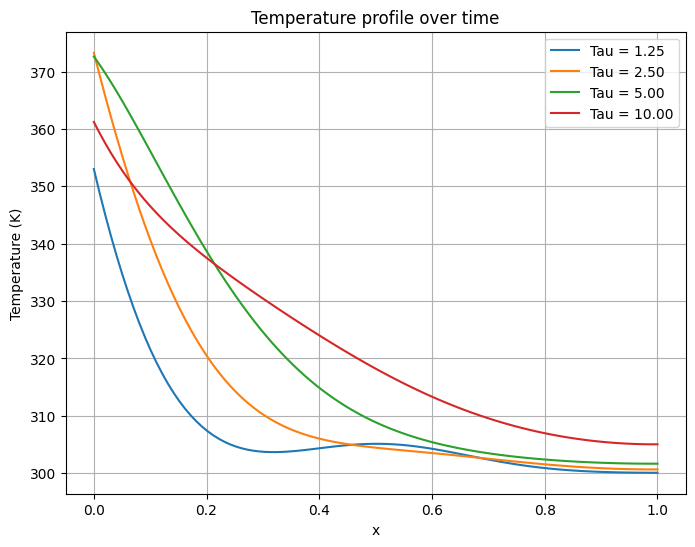

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0        # Length of the domain
a = 0.01       # Thermal diffusivity
k = 1.0        # Thermal conductivity
h_0 = 5.0      # Heat transfer coefficient
Nx = 100       # Number of spatial grid points
dx = L / (Nx - 1)  # Spatial step size

# CFL condition to determine stable dt
CFL = 0.25  # CFL number for stability (should be <= 0.5 for explicit schemes)
dt = CFL * dx**2 / a  # Adjust dt based on dx and a

tau_max = 10   # Max time
Nt = int(tau_max / dt)  # Number of time steps

# Create grid
x = np.linspace(0, L, Nx)
tau = np.linspace(0, tau_max, Nt)

# Initialize temperature array
T = np.zeros((Nt, Nx))

# Initial condition: non-uniform temperature profile
T[0, :] = 300  # Set initial temperature to 300 K everywhere
T[0, Nx//2] = 500  # Create a hotspot in the middle (500 K)

# Function for time-varying external temperature at the boundary x = 0
def T_e(tau):
    return 400 + 50 * np.sin(2 * np.pi * tau / tau_max)  # Example: varying between 350 K and 450 K

# Time-stepping loop (explicit finite difference method)
for n in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        # Finite difference discretization of the PDE with stability control
        T[n+1, i] = T[n, i] + a * dt / dx**2 * (T[n, i+1] - 2*T[n, i] + T[n, i-1])
    
    # Apply boundary condition at x=0 (Fourier's law with time-varying external temperature)
    T[n+1, 0] = (T[n, 1] + dx * h_0 * T_e(tau[n]) / k) / (1 + dx * h_0 / k)

    # Apply Neumann boundary condition at x=L (insulated boundary, dT/dx = 0)
    T[n+1, -1] = T[n+1, -2]  # Insulated boundary condition
    
    # Clamp values to avoid overflow or unrealistic temperatures
    T[n+1, :] = np.clip(T[n+1, :], 0, 1000)  # Clamp between 0K and 1000K (example)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(x, T[Nt//8, :], label=f'Tau = {tau[Nt//8]:.2f}')
plt.plot(x, T[Nt//4, :], label=f'Tau = {tau[Nt//4]:.2f}')
plt.plot(x, T[Nt//2, :], label=f'Tau = {tau[Nt//2]:.2f}')
plt.plot(x, T[-1, :], label=f'Tau = {tau[-1]:.2f}')
plt.xlabel('x')
plt.ylabel('Temperature (K)')
plt.title('Temperature profile over time')
plt.legend()
plt.grid(True)
plt.show()


### Key aspects:
1. **Finite Difference Approximation**:
   - The second spatial derivative $\frac{\partial^2 T}{\partial x^2}$ is approximated using a central difference.
   - The time derivative $\frac{\partial T}{\partial \tau}$ is updated using forward differencing.

2. **Boundary Condition at $x=0$**:
   - This uses Fourier's law $-k \frac{\partial T}{\partial x}\Big|_{x=0} = h_0 (T_e(\tau) - T(0, \tau))$, rearranged to update $T(0, \tau)$.

3. **Boundary Condition at $x=L$**:
   - The insulated boundary condition ($\frac{\partial T}{\partial x} = 0$) is applied at the right boundary.

This script gives a numerical solution to the heat conduction problem with the given boundary conditions. You can modify parameters like `h_0`, `T_e_tau`, and spatial resolution for different cases.

Let's break down the differential equation and boundary conditions step by step in simple terms:

### The Heat Equation (PDE)

The given partial differential equation (PDE) is:

$$
\frac{\partial^2 T(x, \tau)}{\partial x^2} = \frac{1}{a} \frac{\partial T(x, \tau)}{\partial \tau}
$$

This is a form of the **heat equation**, which describes how heat (or temperature) evolves in a material over time and space. Here's what the terms mean:

- $ T(x, \tau) $: This is the temperature at a position $ x $ along a material (like a rod or wall) and at time $ \tau $. The temperature depends on both space and time.
- $ \frac{\partial^2 T}{\partial x^2} $: This is the **second spatial derivative** of the temperature. It tells us how the temperature changes with respect to space. If it's large, there is a lot of spatial variation in the temperature, meaning the temperature is changing quickly over distance.
- $ \frac{\partial T}{\partial \tau} $: This is the **time derivative** of the temperature, describing how temperature changes over time.

The constant $ a $ is the **thermal diffusivity** of the material. It is a property that combines thermal conductivity, specific heat capacity, and density, and it measures how fast heat spreads through the material.

#### Physical Meaning

- The **left side** of the equation ($ \frac{\partial^2 T}{\partial x^2} $) represents how temperature changes along the spatial dimension (like how the heat is distributed across a rod at a given time).
- The **right side** ($ \frac{1}{a} \frac{\partial T}{\partial \tau} $) represents how temperature changes over time at a given point in space.

In short, this equation says that the change in the distribution of temperature over space (how curved or steep the temperature profile is) determines how quickly the temperature at a point changes over time.

---

### Boundary Conditions

In addition to the PDE, boundary conditions specify the behavior of the system at certain points in space (boundaries). You have a boundary condition at $ x = 0 $:

$$
-k \frac{\partial T}{\partial x}\Big|_{x=0} = h_0 (T_e(\tau) - T(0, \tau))
$$

#### Understanding the Boundary Condition

Let’s break this down:

- $ -k \frac{\partial T}{\partial x}\Big|_{x=0} $: This is **Fourier’s law of heat conduction** at $ x = 0 $. It says that the rate of heat flow through a surface is proportional to the gradient (slope) of the temperature. The negative sign comes from the fact that heat flows from hot to cold.
    - $ k $: Thermal conductivity of the material. It tells you how well the material conducts heat.
    - $ \frac{\partial T}{\partial x}\Big|_{x=0} $: The temperature gradient at $ x = 0 $, indicating how fast temperature is changing near that point.

- $ h_0 (T_e(\tau) - T(0, \tau)) $: This term describes **convective heat transfer** at $ x = 0 $. Convective heat transfer occurs when heat is transferred between the material and its surrounding environment.
    - $ h_0 $: The heat transfer coefficient. This describes how easily heat is transferred between the surface of the material (at $ x = 0 $) and its surroundings (such as air or fluid). A higher value of $ h_0 $ means more heat transfer.
    - $ T_e(\tau) $: The external temperature at the boundary. This can change over time.
    - $ T(0, \tau) $: The temperature of the material at the boundary ($ x = 0 $).

#### Physical Meaning

This boundary condition represents a **heat exchange** between the material at $ x = 0 $ and its surrounding environment. 

- The term $ h_0 (T_e(\tau) - T(0, \tau)) $ describes how the temperature difference between the external environment and the material at $ x = 0 $ drives heat transfer. If $ T_e(\tau) $ is greater than $ T(0, \tau) $, heat flows into the material, warming it up. If $ T(0, \tau) $ is greater than $ T_e(\tau) $, heat flows out, cooling the material.
- The term $ -k \frac{\partial T}{\partial x}\Big|_{x=0} $ measures how much heat is leaving or entering the material at that boundary due to conduction.

So, this boundary condition tells us how much heat enters or leaves the material at $ x = 0 $ due to both conduction and convection.

---

### Neumann Boundary Condition at $ x = L $

In addition, you often have a boundary condition at the other end of the material (e.g., $ x = L $). A common one is the **insulated boundary condition**, which says no heat is flowing through the boundary:

$$
\frac{\partial T}{\partial x}\Big|_{x=L} = 0
$$

This is a **Neumann boundary condition** that implies that the heat flux at $ x = L $ is zero (i.e., the boundary is insulated). The temperature at that boundary may still change, but no heat is entering or leaving the system there.

---

### Summary

The overall system can be summarized as follows:

- **PDE**: The heat equation governs how heat moves within the material over time, with the spatial distribution of temperature controlling how fast temperatures change.
- **Boundary condition at $ x = 0 $**: There is heat transfer between the material and the environment, where the rate of heat transfer depends on the temperature difference between the material and the environment, and also on the properties of the material (thermal conductivity) and the environment (heat transfer coefficient).
- **Boundary condition at $ x = L $**: The end of the material is insulated, meaning no heat flows in or out at that boundary.

This setup models heat conduction within a material with heat being exchanged at one boundary and insulated at the other.

In the equations you're working with, $ \tau $ represents **time**, but it's typically used when a different timescale or a dimensionless form of time is involved. Here’s a detailed explanation of its meaning in the context of your heat equation:

### The Heat Equation
The heat equation you provided is:

$$
\frac{\partial^2 T(x, \tau)}{\partial x^2} = \frac{1}{a} \frac{\partial T(x, \tau)}{\partial \tau}
$$

Where:
- $ T(x, \tau) $ is the temperature at position $ x $ and time $ \tau $.
- $ a $ is the thermal diffusivity, a property of the material, which determines how fast heat spreads.
- $ x $ is the spatial coordinate (position in the material).
- $ \tau $ is a **time-like variable**.

### The Role of $ \tau $
- **Standard time** $ t $: In most cases, when solving the heat equation, we would use $ t $ to represent time.
- **Non-dimensional time (scaling)**: Sometimes, $ \tau $ is used to denote **non-dimensional time**, which is a rescaled or normalized version of time to make the equation simpler to work with. It might be related to $ t $ by some scaling factor. For example, if $ t $ is the real physical time, then $ \tau $ could be a scaled version like:

  $$
  \tau = \frac{t}{t_{\text{ref}}}
  $$
  
  where $ t_{\text{ref}} $ is a reference time (such as a characteristic timescale of the system). This makes $ \tau $ dimensionless, simplifying certain numerical or analytical methods.

- **Dimensional time**: In other cases, $ \tau $ might simply represent real time, but it's used in the equation instead of $ t $ for notation purposes or to emphasize that it's a time variable specific to this problem.

### Why Use $ \tau $ Instead of $ t $?
- **Rescaling**: In heat transfer problems, $ \tau $ is often used to rescale time, making the equations dimensionless, which can simplify the math. For example, this could happen when nondimensionalizing the heat equation using characteristic lengths, times, or temperatures.
- **Different physical processes**: $ \tau $ could also represent a specific "process time" in certain applications. For instance, in transient heat conduction problems, it’s sometimes used to highlight that this time variable relates specifically to how quickly the temperature distribution evolves in the material.

### Conclusion
In your equation, $ \tau $ is most likely representing time (or scaled time) over which the temperature $ T(x, \tau) $ evolves. The use of $ \tau $ instead of $ t $ could reflect either a scaled or dimensionless version of time, or it could simply be used for notational convenience. If you’re working with non-dimensional forms of the heat equation, you may want to identify how $ \tau $ is related to real time $ t $.